#  Two Sample T-Test Coach Lab

Outcomes:

    1.  Practice importing data into pandas dataframe
    2.  Practice developing data-based questions
    3.  Practice data exploration
    4.  Practice conducting two sample t-tests


### Step 1- Import data

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [16]:
heart_data=pd.read_csv('heart.csv')
heart_data[heart_data.chol > 500]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [11]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Step 2- Develop Data-Based Question

Research Question: do women have higher rates of heart disease than man?
                    is there a difference between the ages of men and women who have heart disease?
                    is there a relationship between age and cholesterol level?


Alternate Hypothesis:
        There is the difference between the mean of men's cholesterol levels and women's cholesterol levels 

Null Hypothesis:
         There is not difference between the mean 

### Step 3- Explore data & clean

In [31]:
#Steps on examining data for null values or weird values?
heart_red = heart_data[['sex','chol']]
heart_red.groupby('sex').mean()

,chol
sex,
0,261.455128
1,239.237027


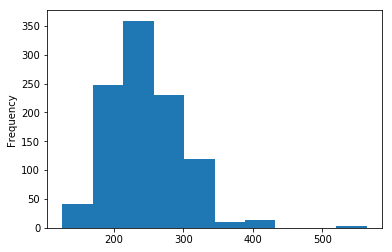

In [32]:
heart_red['chol'].plot(kind='hist')

sex
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: chol, dtype: object

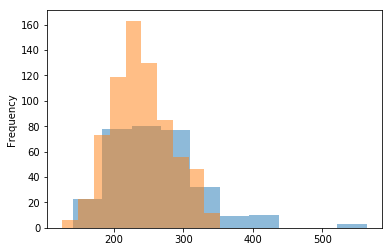

In [39]:
heart_red.groupby('sex').chol.plot(kind='hist', alpha=0.5)

In [ ]:
#Steps for data cleaning

In [ ]:
#Data visualizations/exploration

### Step 4- T-Test to Answer Question

In [44]:
heart_red.groupby('sex').describe()

chol                                                          
     count        mean        std    min    25%    50%    75%    max
sex                                                                 
0    312.0  261.455128  64.466781  141.0  215.0  254.0  302.0  564.0
1    713.0  239.237027  43.155535  126.0  208.0  234.0  269.0  353.0

In [40]:
#Steps to conduct t-test for difference of sample means

from scipy.stats import ttest_ind


In [61]:
heart_new = heart_data[heart_data.chol < 500][['chol', 'target']]
heart_no = heart_new[heart_new.target ==0]['chol']
heart_yes = heart_new[heart_new.target ==1]['chol']

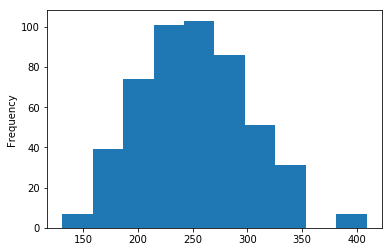

In [54]:
heart_no.chol.plot(kind='hist')

In [62]:
from scipy.stats import levene
levene(heart_no, heart_yes)

LeveneResult(statistic=3.798563940143811, pvalue=0.05157040573104699)